# 流程:
# 1.一次全補(雖然會有倒果為因的問題,但樣本數過少)
# 2.切分為訓練測試,7:3


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import confusion_matrix, mean_absolute_error
from sklearn import svm
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from IPython.core.interactiveshell import InteractiveShell

# for plotting:
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
df = pd.read_excel(r'C:\Users\Big data\Desktop\class\funcardproject\DB104-Roland01\Data.xlsx',encoding='utf-16')
df.head(10)

,Unnamed: 0,age,serveTime,credLimit,Loan,SalPerY,holdCard,Career
0,0,22.0,NaN,20000,NaN,260000.0,1,1
1,1,NaN,NaN,150000,2.0,360000.0,1,2
2,2,NaN,48.0,60000,0.0,450000.0,1,2
3,3,26.0,12.0,70000,0.0,400000.0,1,3
4,4,31.0,60.0,210000,0.0,800000.0,1,2
5,5,26.0,4.0,100000,NaN,500000.0,1,2
6,6,29.0,36.0,200000,2.0,3000000.0,1,2
7,7,22.0,7.0,60000,NaN,550000.0,1,2
8,8,25.0,12.0,250000,0.0,900000.0,1,2
9,9,29.0,48.0,390000,0.0,1000000.0,1,4


# 觀察缺失值會不會太多

In [53]:
#觀察缺失值
df.info()
#有值者接過半,一般最低好像是40%,這樣看來可以捕值,若太多則須整行拿掉
#統計量
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2039 entries, 0 to 2038
Data columns (total 8 columns):
Unnamed: 0    2039 non-null int64
age           1730 non-null float64
serveTime     1754 non-null float64
credLimit     2039 non-null int64
Loan          1692 non-null float64
SalPerY       1687 non-null float64
holdCard      2039 non-null int64
Career        2039 non-null int64
dtypes: float64(4), int64(4)
memory usage: 127.5 KB


,Unnamed: 0,age,serveTime,credLimit,Loan,SalPerY,holdCard,Career
count,2039.000000,1730.000000,1754.000000,2.039000e+03,1692.000000,1.687000e+03,2039.0,2039.000000
mean,1019.000000,26.875723,29.784493,1.499622e+05,0.456856,7.291784e+05,1.0,2.109367
std,588.752919,4.799284,46.204502,2.269981e+05,0.882798,1.348185e+06,0.0,0.636096
min,0.000000,20.000000,0.000000,2.000000e+03,0.000000,2.000000e+04,1.0,1.000000
25%,509.500000,23.000000,6.000000,5.000000e+04,0.000000,3.800000e+05,1.0,2.000000
50%,1019.000000,26.000000,16.000000,1.000000e+05,0.000000,5.000000e+05,1.0,2.000000
75%,1528.500000,30.000000,36.000000,1.800000e+05,1.000000,7.000000e+05,1.0,2.000000
max,2038.000000,56.000000,1278.000000,6.070000e+06,3.000000,3.700000e+07,1.0,4.000000


In [6]:
vars_na = [ var for var in df.columns if df[var].isna().sum() > 1]
for var in vars_na:
    print(var, np.round(df[var].isnull().mean(), 3),  ' % missing values')
#只有age ,serveTime ,Loan ,SalPerY 有缺失值,分析這四個分布即可
#在我們卡片原樣本中,0與無資料的差異是否相同?

age 0.152  % missing values
serveTime 0.14  % missing values
Loan 0.17  % missing values
SalPerY 0.173  % missing values


In [7]:
vars_na

['age', 'serveTime', 'Loan', 'SalPerY']

# 依序針對每樣變數以是否有值做分群,觀察該變數是否有值對於其他變數的影響

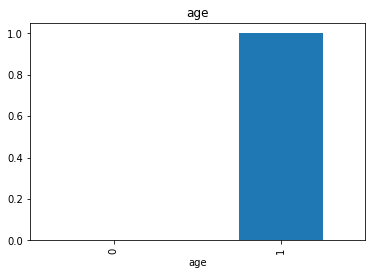

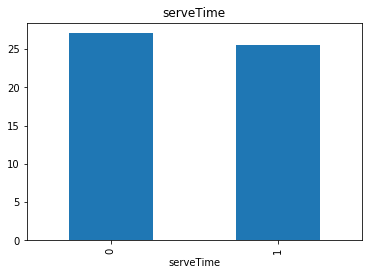

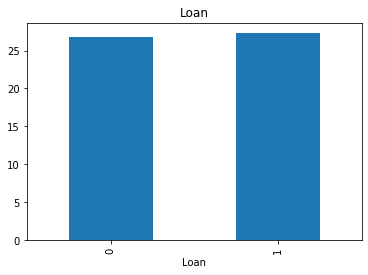

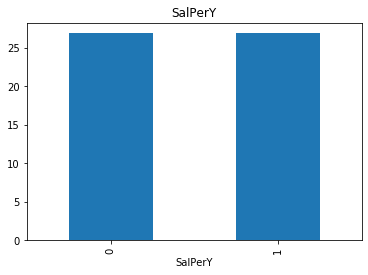

In [8]:
def analyze_na_value(df,var):
    df = df.copy()
    
    
    # 條件機率,觀察交互影響大不大,若不大,應該用平均數或種樹填補即可
    df[var] = np.where(df[var].isnull(), 1, 0)
    
    # plt出在不同項目下,是否為遺漏值之其他變數差異
    df.groupby(var)['age'].mean().plot.bar()
    plt.title(var)
    plt.show()
    
for var in vars_na:
    analyze_na_value(df, var)

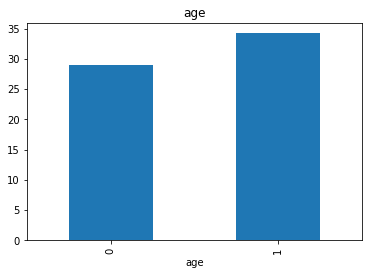

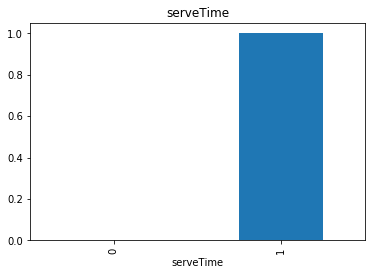

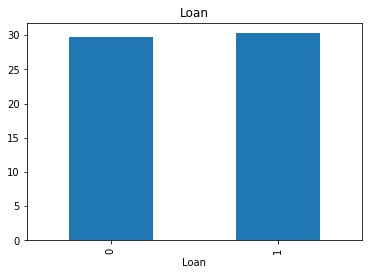

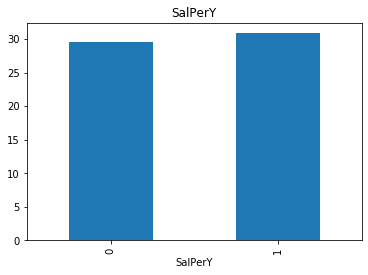

In [9]:
def analyze_na_value(df,var):
    df = df.copy()
    
    
    # 條件機率,觀察交互影響大不大,若不大,應該用平均數或種樹填補即可
    df[var] = np.where(df[var].isnull(), 1, 0)
    
    # plt出在不同項目下,是否為遺漏值之其他變數差異
    df.groupby(var)['serveTime'].mean().plot.bar()
    plt.title(var)
    plt.show()
    
for var in vars_na:
    analyze_na_value(df, var)

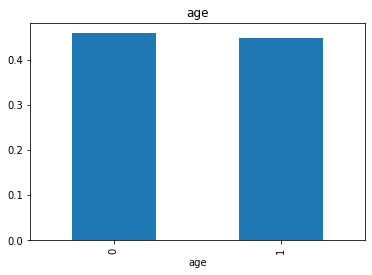

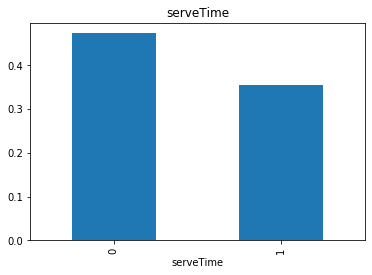

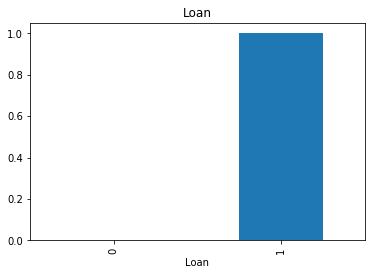

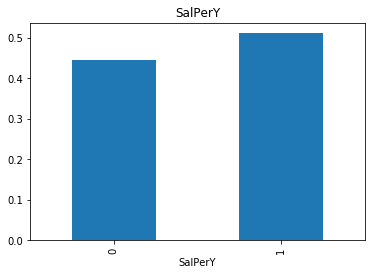

In [10]:
def analyze_na_value(df,var):
    df = df.copy()
    
    
    # 條件機率,觀察交互影響大不大,若不大,應該用平均數或種樹填補即可
    df[var] = np.where(df[var].isnull(), 1, 0)
    
    # plt出在不同項目下,是否為遺漏值之其他變數差異
    df.groupby(var)['Loan'].mean().plot.bar()
    plt.title(var)
    plt.show()
    
for var in vars_na:
    analyze_na_value(df, var)

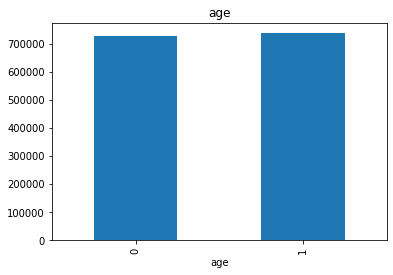

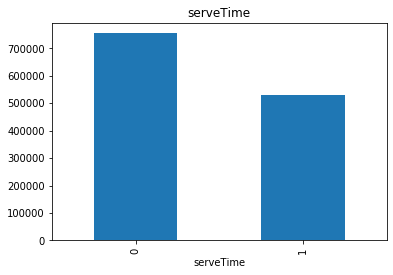

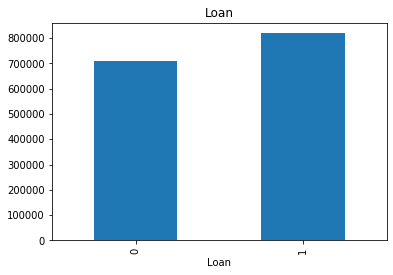

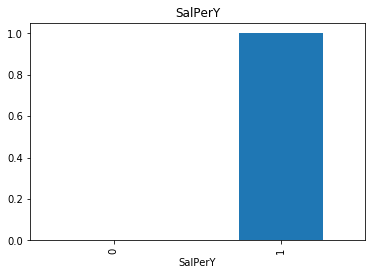

In [11]:
def analyze_na_value(df,var):
    df = df.copy()
    
    
    # 條件機率,觀察交互影響大不大,若不大,應該用平均數或種樹填補即可
    df[var] = np.where(df[var].isnull(), 1, 0)
    
    # plt出在不同項目下,是否為遺漏值之其他變數差異
    df.groupby(var)['SalPerY'].mean().plot.bar()
    plt.title(var)
    plt.show()
    
for var in vars_na:
    analyze_na_value(df, var)

# 看來似乎該欄位遺漏與否並不影響其他欄位之值(目測)但是還試試看其他補值法
# 預測Y為數值

In [54]:
from impyute.imputation.cs import fast_knn
from impyute.imputation.cs import mice
from sklearn.preprocessing import Imputer

In [108]:
#KNN補值
imputed_training = fast_knn(df,k=2)
imputed_training.to_excel(r"C:\Users\Big data\Desktop\class\funcardproject\補值data\補值_KNN_Y為數值.xls")

C:\ProgramData\Anaconda3\lib\site-packages\impyute\util\preprocess.py:52: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  args[0] = args[0].as_matrix()


In [103]:
#mice_Wald補值
df_mice_Wald = mice(df,meth='Wald')
df_mice_Wald.to_excel(r"C:\Users\Big data\Desktop\class\funcardproject\補值data\補值_mice_Wald_Y為數值.xls")

In [104]:
#mice_pmm補值
df_mice_pmm = mice(df,meth='pmm')
df_mice_pmm.to_excel(r"C:\Users\Big data\Desktop\class\funcardproject\補值data\補值_pmm_Y為數值.xls")

C:\ProgramData\Anaconda3\lib\site-packages\impyute\util\preprocess.py:52: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  args[0] = args[0].as_matrix()


In [105]:
#mice_cart補值
df_mice_cart = mice(df,meth='cart')
df_mice_cart.to_excel(r"C:\Users\Big data\Desktop\class\funcardproject\補值data\補值_cart_Y為數值.xls")

C:\ProgramData\Anaconda3\lib\site-packages\impyute\util\preprocess.py:52: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  args[0] = args[0].as_matrix()


In [106]:
#mice_rf補值
df_mice_rf = mice(df,meth='rf')
df_mice_rf.to_excel(r"C:\Users\Big data\Desktop\class\funcardproject\補值data\補值_rf_Y為數值.xls")

C:\ProgramData\Anaconda3\lib\site-packages\impyute\util\preprocess.py:52: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  args[0] = args[0].as_matrix()


In [107]:
#mice_logreg補值
df_mice_logreg = mice(df,meth='logreg')
df_mice_logreg.to_excel(r"C:\Users\Big data\Desktop\class\funcardproject\補值data\補值_logreg_Y為數值.xls")

C:\ProgramData\Anaconda3\lib\site-packages\impyute\util\preprocess.py:52: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  args[0] = args[0].as_matrix()


# 以下是作預測額度的分群,轉為類別變數較為直覺(直接可以看到正確率),也可解決極端值問題
# 也可直接預測數值,但會比較麻煩,EX:實際值20000,預測值20001,若用分類來看是錯的,必須要用標準化((20001-20000)/std)後得到MSE以觀察結果好壞

# 在分群之前先觀察全部樣本資料散佈圖,可以看到有極端的額度

Text(0, 0.5, 'sequence')

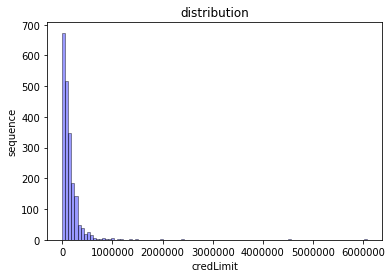

In [71]:
# seaborn histogram
#先觀察和卡額度分布圖,可看到最高有到500萬的離群值,然而大部分的額度都在50萬以下
sns.distplot(df['credLimit'], hist=True, kde=False, 
             bins=int(100), color = 'blue',
             hist_kws={'edgecolor':'black'})
plt.title('distribution')
plt.xlabel('credLimit')
plt.ylabel('sequence')

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0, 0.5, 'sequence')

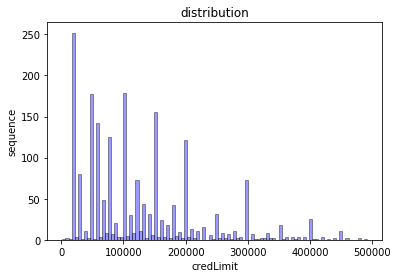

In [72]:
# seaborn histogram
#range取0到50萬,觀察一下分布型態
#可看到有關卡額度
filtered = df[(df >= 0) & (df <500000)]
sns.distplot(filtered['credLimit'], hist=True, kde=False, 
             bins=int(100), color = 'blue',
             hist_kws={'edgecolor':'black'})
plt.title('distribution')
plt.xlabel('credLimit')
plt.ylabel('sequence')

Text(0, 0.5, 'sequence')

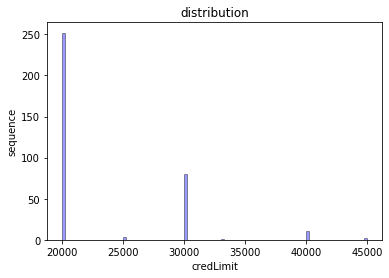

In [73]:
# seaborn histogram
#range取0到10萬
#
filtered = df[(df >= 20000) & (df <50000)]
sns.distplot(filtered['credLimit'], hist=True, kde=False, 
             bins=int(100), color = 'blue',
             hist_kws={'edgecolor':'black'})
plt.title('distribution')
plt.xlabel('credLimit')
plt.ylabel('sequence')

# 若要分群,有2個考量點:
   ## １.分界點必須選在稀疏區(明顯斷層,否則會模稜兩可)
   ##  2.每個區段樣本數不能過少或是數量差異過大
# 分群採用:
# 2W(含)W~4.5W(含)#因為學生很容易斷出來
# 4.5W~9.5W(含)
# 9.5W到19.5W(含)
# 19.5W以上到29.5W(含)
# 29.5W以上
# 一共五類
# 不一定要這樣分,根據經驗僅供參考

In [74]:
#把credLimit這欄依照上述轉為類別
df_group=df
df_group.loc[(df_group['credLimit'] >= 10) & (df_group['credLimit'] <=45000),'credLimit']=0
df_group.loc[(df_group['credLimit'] > 45000) & (df_group['credLimit'] <=95000),'credLimit']=1
df_group.loc[(df_group['credLimit'] > 95000) & (df_group['credLimit'] <=195000),'credLimit']=2
df_group.loc[(df_group['credLimit'] > 195000) & (df_group['credLimit'] <=295000),'credLimit']=3
df_group.loc[(df_group['credLimit'] > 295000) ,'credLimit']=4

Text(0, 0.5, 'sequence')

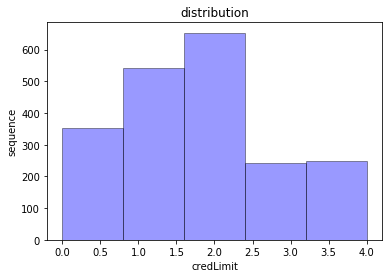

In [75]:
#在檢視一次樣本,各個級數數量並無差太多,應該可以?
sns.distplot(df_group['credLimit'], hist=True, kde=False, 
             bins=int(5), color = 'blue',
             hist_kws={'edgecolor':'black'})
plt.title('distribution')
plt.xlabel('credLimit')
plt.ylabel('sequence')

In [109]:
#KNN補值
imputed_training = fast_knn(df_group,k=2)
imputed_training.to_excel(r"C:\Users\Big data\Desktop\class\funcardproject\補值data\補值_KNN_Y分群.xls")

In [110]:
#mice_Wald補值
df_mice_Wald_group = mice(df_group,meth='Wald')
df_mice_Wald_group.to_excel(r"C:\Users\Big data\Desktop\class\funcardproject\補值data\補值_mice_Wald_Y分群.xls")

In [111]:
#mice_pmm補值
df_mice_pmm_group = mice(df,meth='pmm')
df_mice_pmm_group.to_excel(r"C:\Users\Big data\Desktop\class\funcardproject\補值data\補值_pmm_Y分群.xls")

C:\ProgramData\Anaconda3\lib\site-packages\impyute\util\preprocess.py:52: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  args[0] = args[0].as_matrix()


In [112]:
#mice_cart補值
df_mice_cart_group = mice(df,meth='cart')
df_mice_cart_group.to_excel(r"C:\Users\Big data\Desktop\class\funcardproject\補值data\補值_cart_Y分群.xls")

C:\ProgramData\Anaconda3\lib\site-packages\impyute\util\preprocess.py:52: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  args[0] = args[0].as_matrix()


In [113]:
#mice_rf補值
df_mice_rf_group = mice(df,meth='rf')
df_mice_rf_group.to_excel(r"C:\Users\Big data\Desktop\class\funcardproject\補值data\補值_rf_Y分群.xls")

C:\ProgramData\Anaconda3\lib\site-packages\impyute\util\preprocess.py:52: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  args[0] = args[0].as_matrix()


In [114]:
#mice_logreg補值
df_mice_logreg_group = mice(df,meth='logreg')
df_mice_logreg_group.to_excel(r"C:\Users\Big data\Desktop\class\funcardproject\補值data\補值_logreg_Y分群.xls")

C:\ProgramData\Anaconda3\lib\site-packages\impyute\util\preprocess.py:52: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  args[0] = args[0].as_matrix()
